In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
import math
from pylab import *
from IPython.display import display, Math, Latex
from numba import jit
import glob
%matplotlib inline
# Use writeFile to write files in the correct format!
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from Writebin import *

In [8]:
Topo="flat"  # Please Choose ridge, slope or flat
Wind="Standard"  # Sine bell 0.2N/m$^2$
Heat="nonetQ"  # Please Choose Abernathey or nonetQ
BC="Sponge"  # Please Choose Sponge or Diffusion
Name="Changing_Strat0"  # Give Experiment Name
D=250  # If diffusion then max diffusion enhancement is required

In [9]:
# Adjust accordingly
Res = 5000
Ly = 2000e3
Lx = 1000e3 #Full domain = 4000km otherwise 1000km
H=  3800 # Diffusion = 3800m, Sponge = 2985m
nz = 30 # Diffusion = 24 level, Sponge= 30 levels
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']

In [10]:
#Dimensions
nx = np.round(Lx/Res)
ny = np.round(Ly/Res)
dx = np.ones(nx)*Res
dy = np.ones(ny)*Res
#Write binary output
writeFile('delY',dy)
writeFile('delX',dx)
# Create c-grid with grid points in dead center
x = (np.cumsum(dx)-dx/2)-Lx/2
y = (np.cumsum(dy)-dy/2)-Ly/2
[Y, X] = np.meshgrid(y, x) 

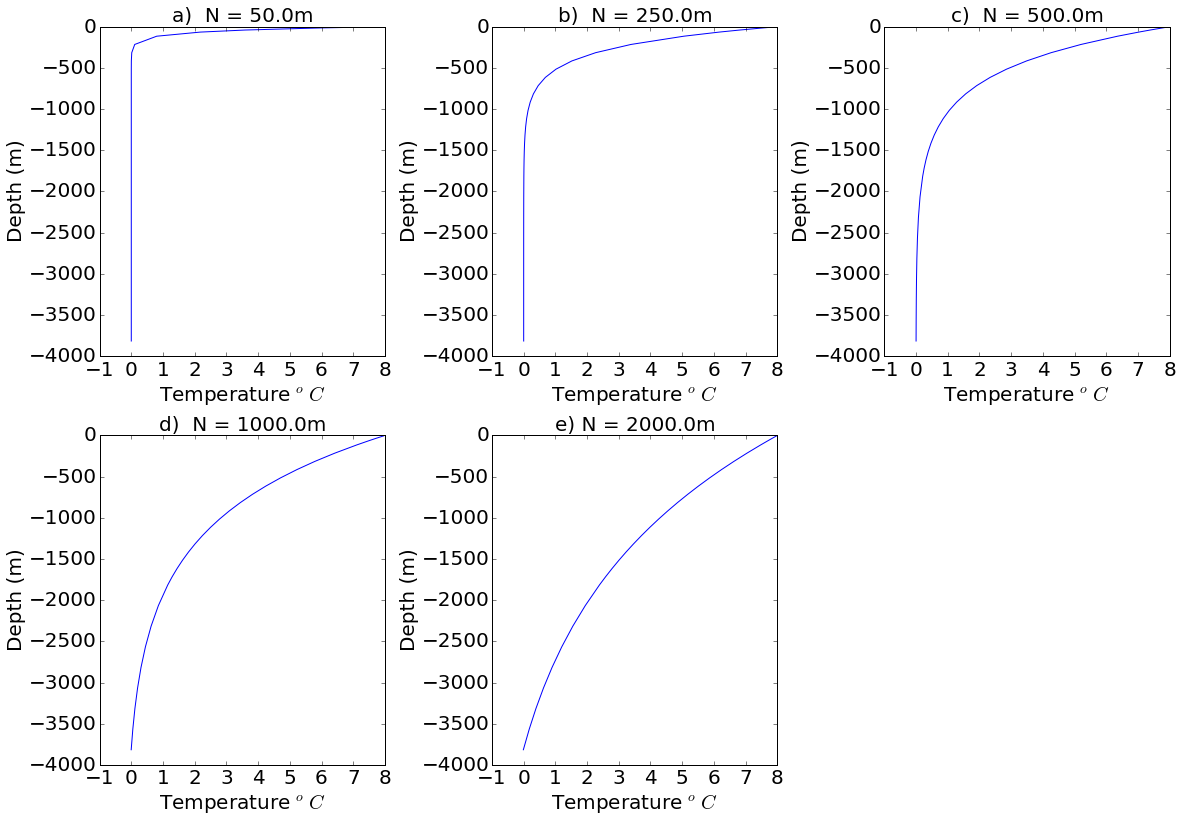

In [17]:
#Parameters
Ns=[0.05e3,0.25e3,0.5e3,1e3,2e3] # Natural stratification
#Ns= np.array(Ns)
a=5,15,40,65
b=np.linspace(115,1715,17)
c=np.linspace(1815,3815,9)
z=np.concatenate([a,b,c])
deltaT=8
Tref=np.zeros(nz)
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Ns)):
    N=Ns[i]
    ax = fig.add_subplot(3, 3, i+1)
    Tref = deltaT*(exp(-z/N)-exp(-H/N))/(1-exp(-H/N))
    p=ax.plot(Tref,-z)
    #ax.gca().invert_yaxis()
    ax.set_title(str(Figletter[i])+' N = '+str(Ns[i])+'m', fontsize=20)
    ax.set_ylabel('Depth (m)', fontsize=20)
    ax.set_xlabel('Temperature $^oC$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()